<a href="https://colab.research.google.com/github/kursataker/cng562-machine-learning-spring-19/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression 

In *regression*, we want to find a function $f$ that maps inputs $\boldsymbol{x} \in \mathbb{R}^D$ to corresponding function values $f(\boldsymbol{x}) \in \mathbb{R}$ given a set of training inputs $\boldsymbol{x}_n$ and corresponding observations $y_n=f(\boldsymbol{x}_n)+\epsilon$, where $\epsilon$ is a random variable that comprises measurement noise and unmodeled processes. (MML, pp. 289)

## Regression Methods

- K-Nearest Neighbor
- Decision Tree 
- Linear (Polynomial, Fourier, Radial Basis Functions)
- Gaussian Processes







In [0]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

## A Toy Problem


In [0]:
X_train = np.linspace(0,1,10).transpose()
y_true = 2 * X_train + 3

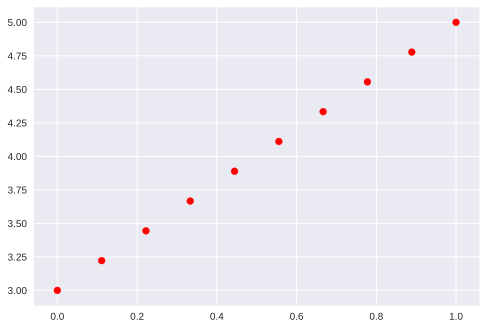

In [0]:
plt.scatter(X_train, y_true, marker='o', color='r');

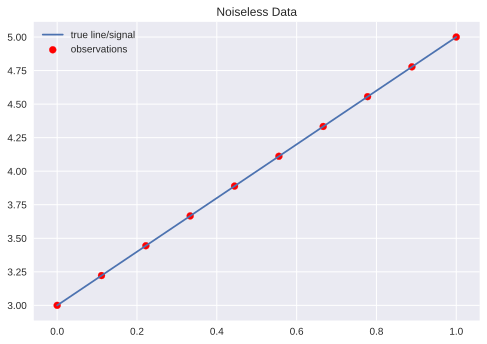

In [0]:
plt.scatter(X_train, y_true, marker='o', color='r', label='observations')
plt.plot(X_train, y_true, label='true line/signal')
plt.title("Noiseless Data")
plt.legend();

## Let's add some noise to our predicted values.

In [0]:
noise = np.random.normal(0, 0.2, size=len(y_true))
y_train = y_true + noise

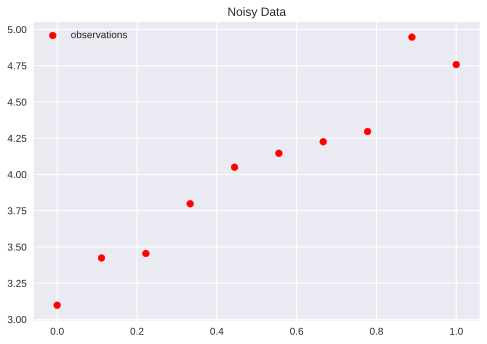

In [0]:
plt.scatter(X_train, y_train, marker='o', color='r', label='observations')
#plt.plot(X_train, y_true, label='true line/signal')
plt.title("Noisy Data")
plt.legend();

## K-Nearest Neighbor Algorithm

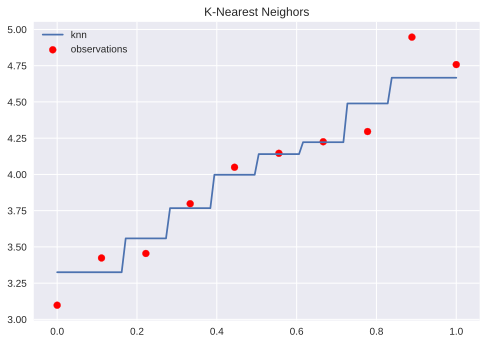

In [0]:
# n_neighbors = number of neighbors
# `p` refers to the distance metric L^p.
# Default value of p is 2.

knnreg = KNeighborsRegressor(n_neighbors=3, p=2)
knn = knnreg.fit(X_train.reshape(-1,1), y_train)

X_plot = np.linspace(0, 1, 100)
y_knn = knn.predict(X_plot.reshape(-1,1))

plt.scatter(X_train, y_train, marker='o', color='r', label='observations')
# plt.plot(X_train, y_true, label='true line/signal')
plt.plot(X_plot, y_knn, label='knn')
plt.title("K-Nearest Neighors")
plt.legend();

## Decision Tree Algorithm

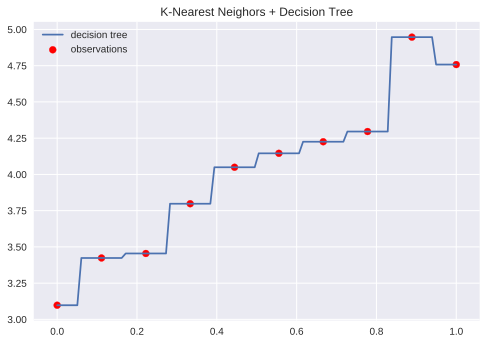

In [0]:
tree = DecisionTreeRegressor(criterion='mse').fit(X_train.reshape(-1,1), y_train)

X_plot = np.linspace(0, 1, 100)
y_tree = tree.predict(X_plot.reshape(-1,1))

plt.scatter(X_train, y_train, marker='o', color='r', label='observations')
# plt.plot(X_train, y_true, label='true line/signal')
# plt.plot(X_plot, y_knn, label='knn')
plt.plot(X_plot, y_tree, label='decision tree')
plt.title("K-Nearest Neighors + Decision Tree")
plt.legend();

## Simple Linear Regression



By *Simple Linear Regression*, we understand where $y = \theta_0 + \theta_1 x + \epsilon$, where the dependent variable $y$ relies linearly on the 1-dimensional independent variable $x$. Here, $\epsilon$ denotes the measurement error and unmodeled processes.

We can express *Simple Linear Regression* also as
$$ y = \theta_0 \cdot 1+ \theta_1 \cdot x + \epsilon = 
\begin{bmatrix} \theta_0 \\ \theta_1\end{bmatrix}^T
\begin{bmatrix} 1 \\ x\end{bmatrix} + \epsilon.
$$



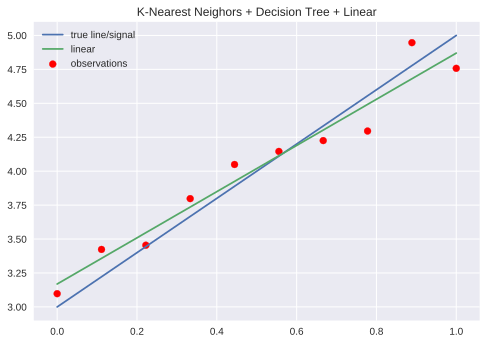

In [0]:
tree = DecisionTreeRegressor().fit(X_train.reshape(-1,1), y_train)

X_plot = np.linspace(0, 1, 100)

degree=1
XX_train = np.array([X_train**k for k in range(degree+1)]).transpose()

reg = LinearRegression(fit_intercept=False).fit(XX_train, y_train)

XX_plot = np.array([X_plot**k for k in range(degree+1)]).transpose()
y_linear = reg.predict(XX_plot)

plt.scatter(X_train, y_train, marker='o', color='r', label='observations')
plt.plot(X_train, y_true, label='true line/signal')
#plt.plot(X_plot, y_knn, label='knn')
# plt.plot(X_plot, y_tree, label='decision tree')
plt.plot(X_plot, y_linear, label='linear')

plt.title("K-Nearest Neighors + Decision Tree + Linear")
plt.legend();

## What does it mean for a supervised learning model to learn?

In supervised learning, during the training phase, we measure the given labels $y_n$ against the predicted labels $\hat{y}_n$, by a *loss function*, $\ell(y_n, \hat{y}_n)$ to assess how good an approximation  the predicted label $\hat{y}_n$ is to the corresponding training label $y_n$. The average loss is measured by the *empirical risk function* 
$$ \boldsymbol{R}_\mathrm{emp}(f, X, y) = \frac{1}{N}\sum_{n=1}^N \ell(y_n, \hat{y}_n).$$

Smaller the value of the empirical risk function is, better the model is.

**Training a supervised learning model** means to optimize the empirical risk function by appropriately choosing the parameters of the model.

Clearly, different choices of loss functions would yield different optimal values of the model parameters.

For regression, the loss  function is typically the *squared error loss*
$$\ell(y_n, \hat{y}_n)=(y_n -\hat{y}_n)^2.$$

The corresponding *empirical risk function* is the *mean squared error*

$$ \boldsymbol{R}_\mathrm{emp}(f, X, y) = \frac{1}{N}\sum_{n=1}^N (y_n -\hat{y}_n)^2.$$



`scikit-learn.metrics` provides a function `mean_squared_error`.

Using *mean squared error*, we can compare which model approximates the training data better.

In [0]:
from sklearn.metrics import mean_squared_error

# y_knn, y_tree, y_linear contains 100 entries. Take every 10th entry!
print('mse for knn:', mean_squared_error(y_train, y_knn[::10]))
print('mse for decision tree:', mean_squared_error(y_train, y_tree[::10]))
print('mse for linear:', mean_squared_error(y_train, y_linear[::10]))


mse for knn: 0.030621055978320134
mse for decision tree: 0.04710214885343918
mse for linear: 0.025016798530191363


## Which model is good? Which model is better?

The fact that our model has learnt the training data, that is the empirical risk function on the training data is minimized, is *unfortunately* is not indicative of the performance of the model on the *unseen-before data*. 

There are numerous statistical criteria to indicate the potentil performance of a model on a *unseen-before data* such as AIC (Akaike Information Criteria), BIC (Bayesian Information Criteria) etc.

To compare the performance of two models, we will take a more direct and naive approach and measure the performance of the models on some *test data* which we did not use during the training. 

In [0]:
X_test = np.sort(np.random.uniform(0,1, len(X_train))).transpose()
y_test = 2 * X_test + 3 + np.random.normal(0, 0.2, size=len(X_test))

In [0]:
X_test, y_test

(array([0.18829546, 0.24005435, 0.36802412, 0.44816412, 0.46064251,
        0.48131825, 0.63266242, 0.66901184, 0.85993007, 0.97900054]),
 array([3.13190571, 3.16900101, 3.6802777 , 3.481794  , 3.92692232,
        3.67044039, 4.0165215 , 4.49398407, 4.62474212, 5.17479094]))

In [0]:
# knn
print('mse for knn:', mean_squared_error(y_test, 
                                         knn.predict(X_test.reshape(-1,1))))
# decision tree
print('mse for decision tree:', 
      mean_squared_error(y_test, tree.predict(X_test.reshape(-1,1))))

# linear 
degree=1
XX_test = np.array([X_test**k for k in range(degree+1)]).transpose()

print('mse for linear:', mean_squared_error(y_train, 
                                            reg.predict(XX_test)
                                           ))

mse for knn: 0.10957659920933911
mse for decision tree: 0.10738625432727784
mse for linear: 0.04504773075260822


## Linear Regression

### (without Probability Theory)

https://en.wikipedia.org/wiki/Linear_regression

By *Linear Regression*, we understand model-based regression approach where regression parameters $\theta$ are calculated linearly from the training labels $y_n$.


In Linear Regression, we approximate the dependent variable $y$ using the linear *predictors* $\boldsymbol{\theta}^T\boldsymbol{x}$ ,  where $\boldsymbol{x} \in \mathbb{R}^D$ is the independent variable, $\boldsymbol{\theta}\in \mathbb{R}^D$ is the vector of model parameters:

$$ y = \boldsymbol{\theta}^T\boldsymbol{x} + \epsilon = 
            \theta_1 \cdot x_1 + 
            \theta_2 \cdot x_2 + \cdots + 
            \theta_D \cdot x_D + \epsilon = 
\begin{bmatrix}  \theta_1 \\ \theta_2 \\ \vdots \\ \theta_D\end{bmatrix}^T
\begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_D\end{bmatrix} + \epsilon.
$$

In *least squares regression*, we measure the cost of making an error during the training using the *squared error loss* $\ell(y_n, \hat{y}_n)=(y_n -\hat{y}_n)^2$. We aim to minimize the *empirical risk function* over all the possible parameter values $\boldsymbol{\theta}$, that is 

$$ \min_{\boldsymbol{\theta}\in \mathbb{R}^D} \frac{1}{N} \sum_{n=1}^N (y_n - \boldsymbol{\theta}^T\boldsymbol{x}_n )^2.$$

Here, $\boldsymbol{\theta}^T\boldsymbol{x}_n$ denotes the predicted value corresponding to the $n$th observation, $y_n$.

Collect labels into a vector $\boldsymbol{y}=[y_1, y_2, \ldots, y_N]^T \in \mathbb{R}^N$ and the dataset into a matrix $\boldsymbol{X} = [\boldsymbol{x}_1, \boldsymbol{x}_2,\ldots, \boldsymbol{x}_N]^T \in \mathbb{R}^{N\times D}$. Then, 
$$\frac{1}{N} \sum_{n=1}^N (y_n - \boldsymbol{\theta}^T\boldsymbol{x}_n )^2=
\frac{1}{N} ||\boldsymbol{y-X\theta} ||^2.$$

The matrix  $\boldsymbol{X}$ is called the *design matrix*.

The *least squares regression* aims to find the minimum 

$$ \boldsymbol{\theta^*}:=\min_{\boldsymbol{\theta}\in \mathbb{R}^D} \frac{1}{N} ||\boldsymbol{y-X\theta} ||^2.$$

The empirical risk function $\frac{1}{N} ||\boldsymbol{y-X\theta} ||^2$ has the following properties:
1. It is convex. Therefore has a unique global minimum.
2. It is differentiable. This allows us to employ methods, such as gradient descent, that depend on differentiability.
3. Differentiability is a consequence of the differentiability of the squared error loss.



## Normal Equation
### A Geometric Approach

$\newcommand{\y}{\boldsymbol{y}}$
$\newcommand{\x}{\boldsymbol{x}}$
$\newcommand{\X}{\boldsymbol{X}}$
$\newcommand{\th}{\boldsymbol{\theta}}$
$\newcommand{\RR}{\mathbb{R}}$


The set of all vectors of the form $\boldsymbol{X\theta}$ where $\boldsymbol{\theta} \in \mathbb{R}^D$ forms a subspace $S$ of the vector space  $\mathbb{R}^N$. One can then project the labels vector $\y$ onto this subspace $S$. Denote the resulting vector by $\X\th_p$. Then $\y-\X\th_p$ is perpendicular to the subspace $S$ (By definition of orthogonal projection). That is, for all parameter vectors $\th$, 
\begin{align}0 &= (\X\th)^T (\y-\X\th_p) \\
&= \th^T \X^T(\y-\X\th_p) \\
&= \th^T (\X^T\y-\X^T\X\th_p)
\end{align}

This yields $\th^T (\X^T\y-\X^T\X\th_p)=0$ for all $\th$, which implies $\X^T\y-\X^T\X\th_p=0$. This is called the *normal equation*,

\begin{align} \X^T\X\th_p &=\X^T\y.
\end{align}

When the symmetric matrix $\X^T\X$ is invertible, we obtain
\begin{align} \th_p &=(\X^T\X)^{-1}\X^T\y.
\end{align}

Note that the parameter vector $\th_p$ depends linearly on the training output, the *labels vector* $\y$, highly nonlinearly on the training input, the *design matrix* $\X$.

Note that the matrix $\X^T\X$ is invertible if and only if the matrix $\X$ is full-rank.
A matrix $A$ is full-rank if $Av=0$ implies $v=0$.

The projection $\X\th_p$ is the prediction corresponding to the labels vector $\y$:
\begin{align} \X\th_p &=\X(\X^T\X)^{-1}\X^T\y.
\end{align}

Because $\y-\X\th_p$ is orthogonal to the subspace $S$, the *residual vector* $\y-\X\th_p$ is perpendicular to $\X\th_p - \X\th = \X(\th_p - \th)$. This implies 

$$||\y-\X\th||^2 = ||\y-\X\th_p||^2 + ||\X\th_p - \X\th||^2$$

for all $\th$, which in return proves that

$$ ||\y-\X\th_p||^2 \leq ||\y-\X\th||^2$$

for all $\th$. Namely, $\th_p$ minimizes the empirical risk function $\frac{1}{N}||\y-\X\th||^2$.

### A Calculus Approach
One can arrive at the *normal equation* 
\begin{align} \X^T\X\th_p &=\X^T\y.
\end{align}
by differentiating the empirical risk function $\frac{1}{N}||\y-\X\th||^2$ with respect to $\th$.




## Linear Regression with Probability Theory

What is the significance of Probability Theory in relation to Linear Regression?

In our current model $y=f(\x)+\epsilon$, probability theory enters the model via the noise $\epsilon$.

The assumption that the noise $\epsilon$ is normally distribued with zero mean and variance $\sigma^2$, or equivalently the output $y$ is normally distributed with mean $f(\x)$ and variance $\sigma^2$ leads to the empirical risk minimization procedure that we have witnessed.

There are a number of probabilistic approaches to estimate the parameters $\th$:

1. Maximum Likelihood Estimate (MLE): Maximize the likelihood $p(y|f(\x, \th), \sigma^2)$
2. Maximum A Posteriori (MAP): Maximize the probability $p(\th| \x, y)$
3. Full Bayesian Approach: Instead finding of a particular value $\th$, treat $\th$ as a random variable.

Here we will look into *Maximum Likelihood*. We will dive into the other approaches in due time.

### What is Maximum Likelihood?

Let's start with a problem. Suppose flipping the same coin 10 times, you got 7 heads. What is the probability of heads flipping this coin again?

Your likely answer is $\frac{7}{10}$.

In fact this is the likeliest answer.

Let's denote the probability of heads by $\theta$. In fact, getting 7 heads in 10 tries is 
$$p(\text{7 heads in 10 tries}|\theta) = {10 \choose 7} \theta^7 (1-\theta)^3.$$

This is the *likelihood of 7 heads in 10 tries* for a coin with $P(\text{heads}) = \theta$.

Maximum Likelihood approach suggest that to solve the above problem we maximize this *likelihood function* with respect to $\theta$.

To simplify matters, we can take logarithms of both sides,  we get the *log-likelihood function*
\begin{align} \log p(\text{7 heads in 10 tries}|\theta) &= \log{10 \choose 7} + \log \theta^7 + \log (1-\theta)^3 \\ 
&= 7 \log \theta + 3 \log (1-\theta) + \text{const}.
\end{align}

Because logarithm is an increasing function, *likelihood function* maximizes whenever *log-likelihood function* does.
By differentiating *log-likelihood* and setting the derivative equal to $0$, we obtain

$$\frac{d\log p}{d\theta} = \frac{7}{\theta} - \frac{3}{1-\theta}=0.$$

Solving the equality yields $\theta = \frac{7}{10}$.

That is $P(\text{heads}) = \theta = \frac{7}{10}$ maximizes the probability of getting 7 heads in 10 tries.

In other words, for any $P(\text{heads}) = \theta \neq \frac{7}{10}$, the probability of getting 7 heads in 10 tries is less than the probability of getting 7 heads in 10 tries with $P(\text{heads}) = \theta = \frac{7}{10}$.

### Maximum Likelihood applied to Linear Regression
Assume the $n$th label $y_n$ is random variable with normal distribution with mean $\th^T \x_n$ and variance $\sigma^2$ and $(\x_n, y_n)$ are independent.

The first assumption implies
$$ p(y_n|\x_n, \th) = \mathcal{N}(y|\th^T\x_n, \sigma^2)= \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y_n - \th^T\x_n)^2}{2\sigma^2}}.$$

The second assumption together with the first implies that *likelihood function* is 
$$ 
p(y_1, y_2, \ldots, y_N| \x_1, \x_2, \ldots, \x_N, \th) = \prod_{n=1}^N p(y_n|\x_n, \th) = \prod_{n=1}^N \mathcal{N}(y|\th^T\x_n, \sigma^2).$$

To calculate the optimal parameter $\th_{\text{ML}}$, as before calculate *log-likelihood*:

\begin{align}
\log p &= \sum_{n=1}^N  -\frac{(y_n - \th^T\x_n)^2}{2\sigma^2} + \text{const}.
\end{align}

The *negative log-likelihood* (ignoring the constant terms)

\begin{align}
\mathcal{L}(\th) &= - \log p(y_1, y_2, \ldots, y_N| \x_1, \x_2, \ldots, \x_N, \th)  \\
& = \frac{1}{2\sigma^2}\sum_{n=1}^N  (y_n - \th^T\x_n)^2 \\
& = \frac{1}{2\sigma^2} ||\y - \X\th ||^2.\\
\end{align}

Notice that the *empirical risk* is the *negative log-likelihood* up to rescaling.

Therefore the following are equivalent:
1. Maximize *likelihood*,
2. Maximze *log-likelihood*,
3. Minimize *negative log-likelihood*,
4. Minimize *empirical risk*.

Therefore the parameter $\th_p$ which minimizes the empirical risk and the maximum likelihood estimate $\th_{\text{ML}}$ are equal:
 $$\th_{\text{ML}} = \th_p= (\X^T\X)^{-1}\X^T\y.$$


## Polynomial Regression

Polynomial Regression is Linear Regression where predictor functions are polynomials $\theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_M x^M$.




## Another Toy Example

In [0]:
y_train = np.array([-0.16227992, -0.04237681,  1.09020515,  0.95381663,  0.46309804,
       -0.3637676 , -0.65569859, -1.0909782 , -0.49114435, -0.01196771])

# y_train = np.sin(2*np.pi*X) + np.random.normal(0, 0.2, size=len(X_train))

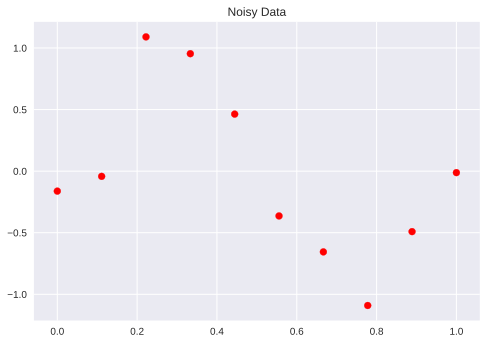

In [0]:
plt.scatter(X_train, y_train, color='r', label='observations')
plt.title("Noisy Data");

In [0]:
def design_matrix(X, degree=0):
  """Return a design matrix whose columns are monomials `x**k`,
  where k is <= `degree`."""
  return np.array([X**k for k in range(degree+1)]).transpose()

def polynomial_regression(X, y, degree=0):
  """Return a linear regression model over a basis of polynomials of 
  at most `degree`."""
  
  XX = design_matrix(X, degree=degree)
  return LinearRegression(fit_intercept=False).fit(XX, y)

In [0]:
def polynomial_model(X, y, degree):

  # Choose degree which is hyper-parameter 
  # measuring the flexibility of our model.

  XX = design_matrix(X, degree)
  reg = polynomial_regression(X, y, degree)

  #print('score:', reg.score(XX, ye)) 

  X_plot = np.linspace(-0.02,1.02,100)
  XX_plot = design_matrix(X_plot, degree)

  plt.title('Degree={}'.format(degree))
  y_plot = reg.predict(XX_plot)
  plt.scatter(X, y, color='r', label='observations')
  plt.plot(X_plot, y_plot, label='prediction')
  plt.legend()
  plt.show()

  return reg.coef_

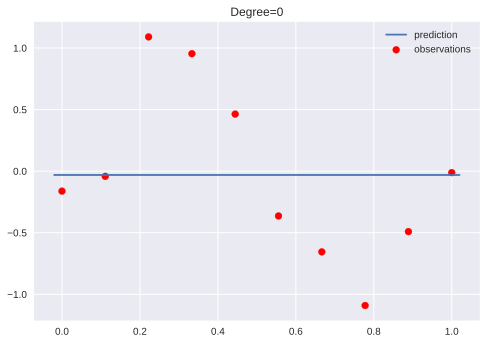

[-0.03110934]


In [0]:
print(polynomial_model(X_train, y_train, 0))

## Let's look at polynomial regression models where degree of the polynomial grows from 0 to 9.

In this example, the degree of the polynomial is a simple measure of model complexity. As the degree increases,
the polynomial gets to have more coefficients.

The graphs show that as the model gets to have more coefficients, the more flexible it becomes and approximates the *training data* better and better.

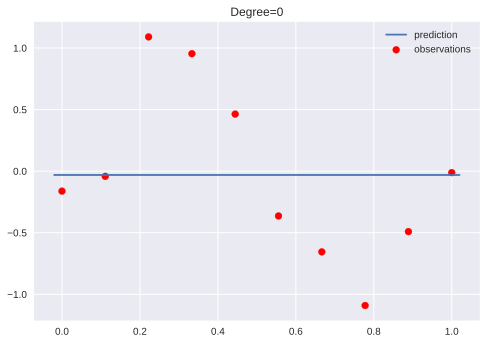

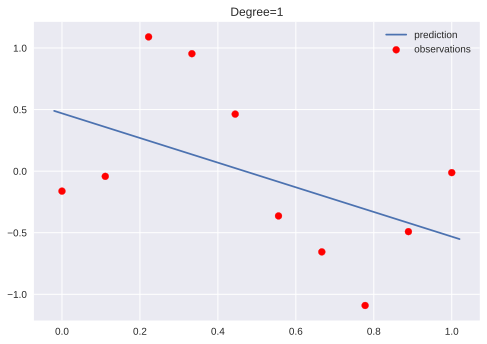

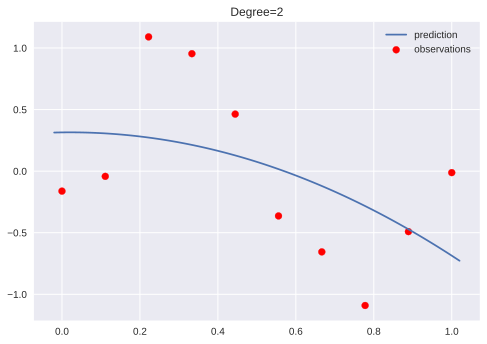

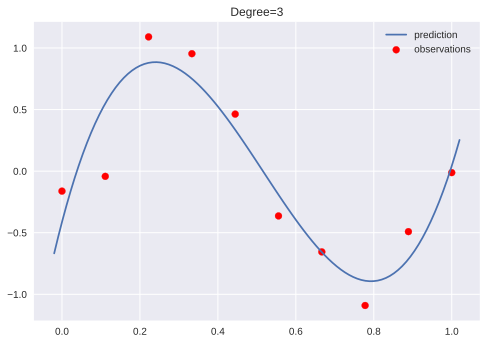

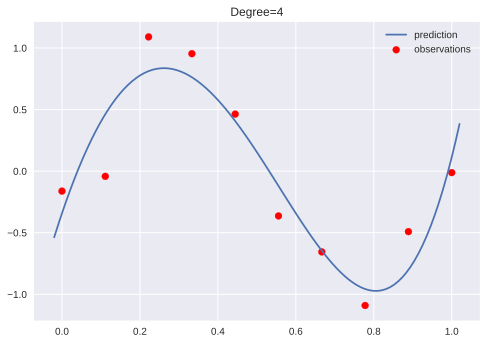

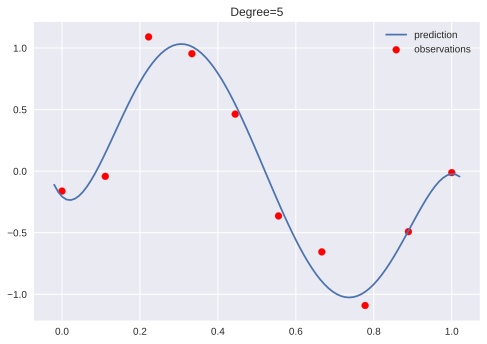

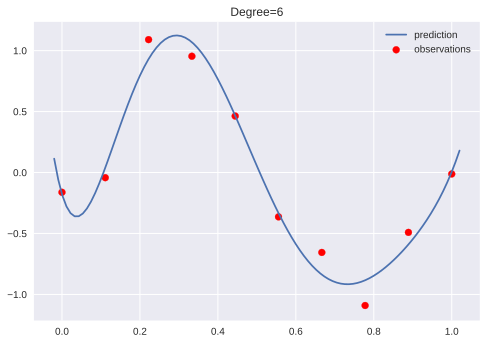

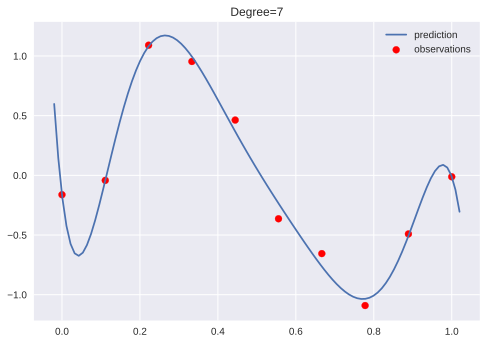

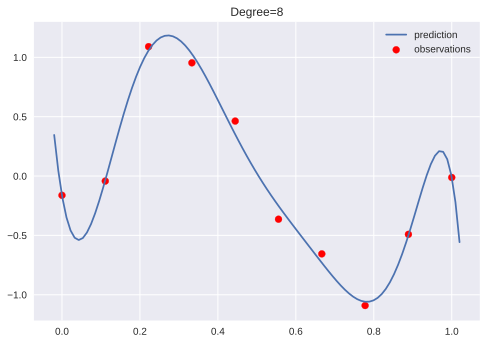

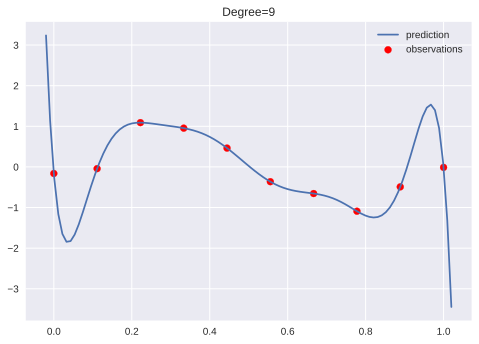

In [0]:

coeffs = [polynomial_model(X_train, y_train, degree) for degree in range(10)]

## What do the coefficients look like?

In [0]:
coeffs

[array([-0.03110934]),
 array([ 0.46934224, -1.00090314]),
 array([ 0.31464083,  0.04333135, -1.04423449]),
 array([ -0.41352871,  12.03212275, -32.64159143,  21.06490463]),
 array([ -0.34243216,   9.36600206, -19.17768199,  -0.53067289,
         10.79778876]),
 array([-2.06567348e-01, -3.01128247e+00,  8.39946610e+01, -2.92164496e+02,
         3.45076180e+02, -1.33711356e+02]),
 array([-1.77784057e-01, -1.06921038e+01,  1.78755013e+02, -7.00021935e+02,
         1.13325085e+03, -8.34806491e+02,  2.33698378e+02]),
 array([-1.61977978e-01, -2.77851356e+01,  4.60803417e+02, -2.37260119e+03,
         5.86257077e+03, -7.73153333e+03,  5.23869725e+03, -1.42999968e+03]),
 array([-1.63170894e-01, -1.92478285e+01,  2.88636390e+02, -1.07401770e+03,
         9.63736279e+02,  2.46736925e+03, -6.66002242e+03,  5.85493073e+03,
        -1.82123260e+03]),
 array([-1.62279920e-01, -1.12260803e+02,  2.43707405e+03, -2.04257858e+04,
         9.18757629e+04, -2.45210760e+05,  3.98897915e+05, -3.87511078e+

## We observe that as degree grows, so do the parameters!

Recall that for polynomial regression, the *degree* measures the complexity of a given model. Keeping this in mind, we observe that as the model becomes more complex, the larger become the coefficients.

In [0]:
[np.linalg.norm(x) for x in coeffs]

[0.031109336000000005,
 1.1054814488129436,
 1.0914678771958208,
 40.671202115720355,
 23.92690110947212,
 478.93695084710805,
 1599.3350817834657,
 11378.819790434924,
 9497.731037728237,
 650365.1501180242]

array([0.04914523, 0.08661678, 0.11994123, 0.17041437, 0.20075009,
       0.29379072, 0.31665169, 0.4022515 , 0.67713452, 0.93712744])

In [0]:
X_test = np.array([0.04914523, 0.08661678, 0.11994123, 0.17041437, 0.20075009,
       0.29379072, 0.31665169, 0.4022515 , 0.67713452, 0.93712744])

# X_test = np.sort(np.random.uniform(0,1, 10))

In [0]:
y_test = np.array([ 0.1664599 ,  0.62854399,  0.26949247,  0.65088976,  0.97853367,
        0.61084064, -1.18315738, -0.8827932 , -0.56292411, -0.72417978])

# y_test = np.sin(2*np.pi*X_test) + np.random.normal(0, 0.2, size=len(X_test))

In [0]:
from sklearn.metrics import mean_squared_error


def error_measures(X_train, y_train, X_test, y_test, degree):
  reg = polynomial_regression(X_train, y_train, degree)
  XX_train = design_matrix(X_train, degree)
  predict_train = reg.predict(XX_train)
  
  XX_test = design_matrix(X_test, degree)
  predict_test = reg.predict(XX_test)

  return (mean_squared_error(y_train, predict_train), 
          mean_squared_error(y_test, predict_test))

In [0]:
errors = np.array([error_measures(X_train, y_train, X_test, y_test, degree) for degree in range(20)])

In [0]:
errors.shape

(20, 2)

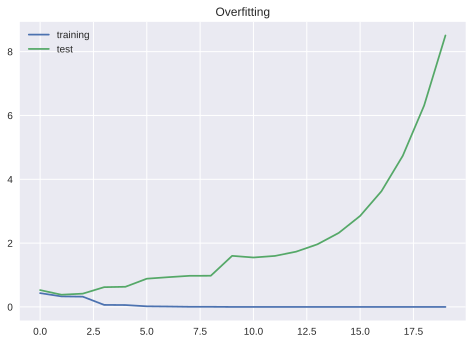

In [0]:
plt.plot(range(errors.shape[0]), errors[:, 0], label='training')
plt.plot(range(errors.shape[0]), errors[:, 1], label='test')
plt.title('Overfitting')
plt.legend();

## Overfitting
A machine learning model is significant as much as it is capable of dealing with *unseen data*. We say when a (supervised learning) model is *overfit* if it predicts well on the training data and badly on the test data.

It is within expectation that the model to predict worse on the test data than on the training data.

After degree $3$ or so, we notice that the training error and the test error diverge. This is the typical picture of *overfitting*.

At the beginnning, both the training error and the test error keep dropping, but after degree $3$ test error keeps increasing whereas training error keeps dropping.

## Some strategies to deal with Overfitting

We have previously seen that as the model complexity (degree) increases, so does the size of the vector $\th$.

One of the ways to deal with overfitting is to add a penalty term to the empirical risk function:

1. Add a term $\alpha ||\th||^2$ for some $\alpha>0$ (Ridge Rigression).

2. Add a term $\beta ||\th||$ for some $\beta>0$ (Lasso Rigression).

3. Add a term $\alpha ||\th||^2 + \beta ||\th||$ for some $\alpha, \beta>0$ (ElasticNet).

Adding such error terms have the effect of pushing components of $\th$ towards $0$, more so for Lasso then Ridge Regression.




